# water marking on images

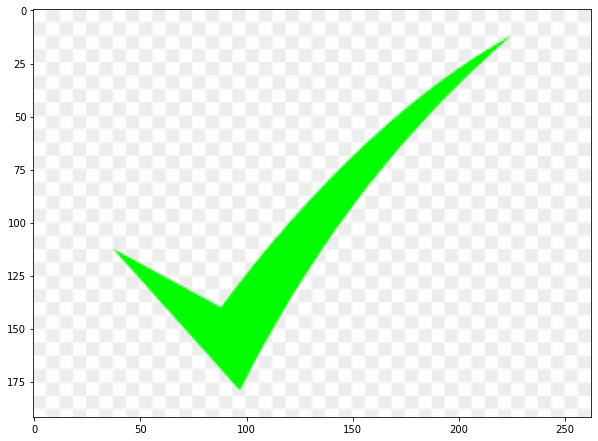

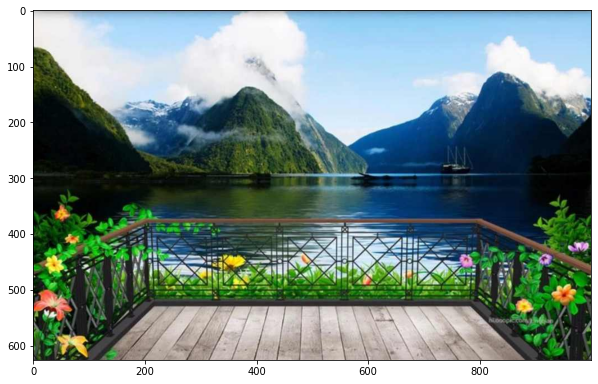

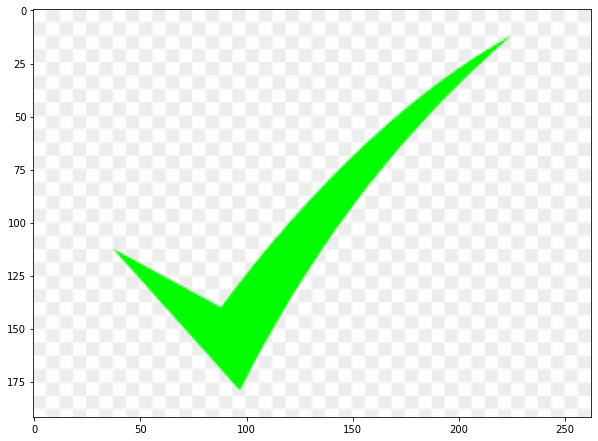

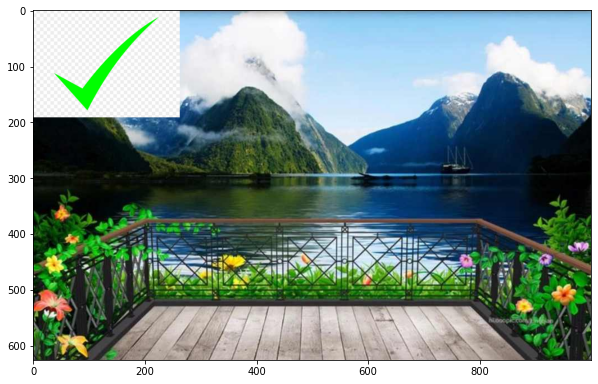

In [1]:
# Importing all libraries which are required

import cv2
import numpy as np
import matplotlib.pyplot as plt

# A function that displays image to make our work easy and fast

def display(img):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.imshow(img)
# A function that coverts the image of color to save time and energy
def color_conv(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

#reading Image

logo=cv2.imread("watermark.png")

wat_mar=cv2.imread("imugi.jpg")
# display both images on screen
display(color_conv(logo))
display(color_conv(wat_mar))

rows,cols,channels=logo.shape
roi = wat_mar[0:rows, 0:cols]
# Converting Color of logo from
img_gray=cv2.cvtColor(logo,cv2.COLOR_BGR2GRAY)
ret,mask=cv2.threshold(img_gray,10,255,cv2.THRESH_BINARY)
mask_inv=cv2.bitwise_not(mask)

backg=cv2.bitwise_and(roi,roi,mask = mask_inv)
foreg=cv2.bitwise_and(logo,logo,mask=mask)

destination=cv2.add(foreg,backg)
wat_mar[0:rows, 0:cols]=destination
cv2.resize(wat_mar,(300,100))
display(color_conv(destination))
display(color_conv(wat_mar))

cv2.waitKey()
cv2.destroyAllWindows()
cv2.imshow("watermarked",wat_mar)